In [48]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

t, k, a = symbols( 't k a' )
init_printing(use_unicode=True)

# Define the vector which is not parallel to any edge vector, which will tend to zero:

Phi = t*(N.i + 2*N.j)

# Set the fixed points of the action; P denotes those that belong
# to the core, and Q those that come from the cut extended core:

def P12(k,a):
    return Vector.zero

def P23(k,a):
    return k*N.i

def P13(k,a):
    return k*N.j

def Q12_1(k,a):
    return -a*N.j

def Q12_2(k,a):
    return -a*N.i

def Q23_2(k,a):
    return (k+a)*N.i

def Q23_3(k,a):
    return (k+a)*N.i - a*N.j

def Q13_1(k,a):
    return (k+a)*N.j

def Q13_3(k,a):
    return -a*N.i + (k+a)*N.j

# Basis for the edge/weight vectors for the points 

v1 = N.i

v2 = N.j

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2):
    return ( Phi.dot(P)**2 ) / ( ( factorial(2) ) * ( Phi.dot(edge1) * Phi.dot(edge2) ) )

def g(P, edge1, edge2, edge3, edge4):
    return ( Phi.dot(P)**4 ) / ( ( factorial(2) ) * ( Phi.dot(edge1) * Phi.dot(edge2) * Phi.dot(edge3) * Phi.dot(edge4) ) )

# For each of the right-angled triangles:


def Core(k,a):
    return g(P12(k,a), v1, v2, -v1, -v2) + g(P13(k,a), v1 - v2, v2, -v1 + v2, -v2) + g(P23(k,a), v1, -v1 + v2, -v1, v1 - v2)

def Exteriors(k,a):
    return g(Q23_3(k,a), v2, -v1 + v2, -v1 + v2, -v1) + g(Q23_2(k,a), -v1 + v2, -v1, -v1, -v2) + g(Q13_1(k,a), v1 - v2, -v1, -v2, -v2) + g(Q13_3(k,a), v1, -v2, v1 - v2, v1 - v2) + g(Q12_1(k,a), v1, v2, v2, -v1 + v2) + g(Q12_2(k,a), v1, v1, v2, v1 - v2)

def WholePolyptych(k,a):
    return Core(k,a) + Exteriors(k,a)



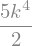

In [49]:
Core(k,a)

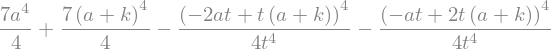

In [50]:
Exteriors(k,a)

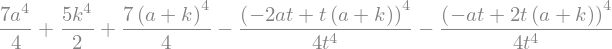

In [51]:
WholePolyptych(k,a)

In [52]:
def Volume(k,a):
    return factor(limit(WholePolyptych(k,a), t, 0))

In [53]:
Volume(k,a)

In [33]:
# NEED TO NORMALISE VECTORS?

# To compare with the dilated 2-simplex for CP2:

def Delta123(k,a):
    return f(P12(k,a), v1, v2) + f(P13(k,a), v1 - v2, -v2) + f(P23(k,a), -v1 + v2, -v1)


def Delta12(k,a):
    return f(P23(k,a), v1, -v1 + v2) + f(Q23_2(k,a), -v1 + v2, -v1) + f(Q13_1(k,a), -v2, v1 - v2) + f(P13(k,a), v1 - v2, v2)

In [38]:

def Delta13(k,a):
    return factor(f(P12(k,a), -v2, v1) + f(P23(k,a), -v1, v1 - v2) + f(Q23_3(k,a), -v1 + v2, -v1) + f(Q12_1(k,a), v2, v1))

In [34]:
Delta123(k,a)

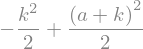

In [35]:
Delta12(k,a)

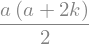

In [39]:
Delta13(k,a)

In [42]:
def Delta1(k,a):
    return Rational(1, 2) * ( a**2 )

In [45]:
def TotalVolume(k,a):
    return Delta123(k,a) + Delta12(k,a) +  ( 2 * Delta13(k,a) ) + ( 3 * Delta1(k,a) )

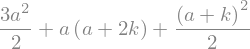

In [46]:
TotalVolume(k,a)

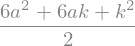

In [47]:
factor(TotalVolume(k,a))